Here's a basic implementation of linear regression in Python using the scikit-learn library.

This code is implemented on a CSV file - Mall_Customers.csv.

The code loads the data into a NumPy array, trains a KMeans model, gets the cluster labels and centroids, and plots the data points colored by their cluster labels and the centroids as X's. The plot is displayed using Matplotlib.



In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly as py
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
# Load the dataset
df = pd.read_csv ('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
#Performing simple exploratory data analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [44]:
#Converting Categorical Values
#Male = 1, Female = 0

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
#Renaming Columns

new_column_names = {
    "Gender": "Gender", 
    "Age": "Age", 
    "Annual Income (k$)": "Income", 
    "Spending Score (1-100)":"Score"
}
df.rename(columns=new_column_names, inplace=True)
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [47]:
#Elbow Method
a_s_clustering_data = df.copy()
sum_of_squared_error = []
max_k = 10
for k in range(1, max_k):
    model = KMeans(n_clusters=k)
    model.fit(a_s_clustering_data)
    sum_of_squared_error.append(model.inertia_)

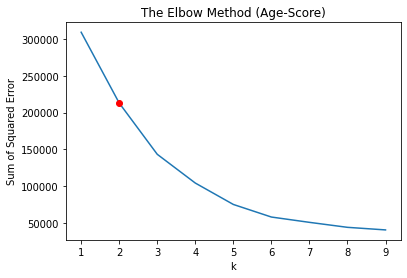

In [48]:
plt.title('The Elbow Method (Age-Score)')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.xticks(range(1, max_k))
plt.plot(range(1,max_k),sum_of_squared_error)
plt.plot(2, sum_of_squared_error[1],'ro') 
plt.show()


In [49]:
#Model Fit k = 2

k=2
model = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
model.fit(a_s_clustering_data)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

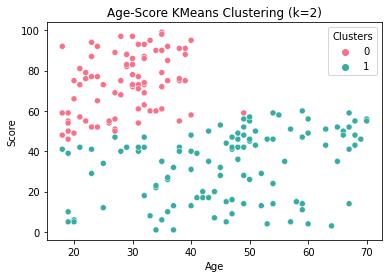

In [50]:
#The plot displayed using Matplotlib

clusters = model.labels_
centroids = model.cluster_centers_
a_s_clustering_data['Clusters'] = clusters

sns.scatterplot(x=a_s_clustering_data['Age'], 
                y=a_s_clustering_data['Score'], 
                hue=a_s_clustering_data['Clusters'], 
                palette=sns.color_palette('husl', k))
plt.title('Age-Score KMeans Clustering (k={})'.format(k))
plt.show()

This is a basic implementation and we need to modify the code to suit the requirements of the project, such as handling missing data, changing the number of clusters, or changing the visualization method.